In [1]:
%matplotlib inline
import numpy as np
from IPython.display import HTML, display
from matplotlib import pyplot as plt
from scipy.optimize import minimize, fmin
import math

# Instruction

5 Problem 100 points each. Full score = 450.

Open book, open notes, open google, open stackoverflow, open exercise, open homework. No chat though.

All I ask is just don't abuse it.

Show your work so I can give partial credits.

# 1. Cancer Classifier

Let us suppose a doctor wants to find a quick way to figure out whether a tumor is a cancerous or benign. So he collect the data of

- Volume (0:Small, 1:Medium, 2: Large)
- Color (0:Red, 1:Brown, 2:Black)
- Density (0:Light, 1:Dense)
- Lab Result (0:Benign, 1:Cancerous)

The data was collect only on those who passed preliminary screening test. The Data is given below.

<table>
<tr>
<td>No</td>
<td>Volume</td>
<td>Color</td>
<td>Density</td>
<td>Result</td>
</tr>
<tr>
<td>1</td>
<td>Large</td>
<td>Red</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>2</td>
<td>Large</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>3</td>
<td>Medium</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>4</td>
<td>Small</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>5</td>
<td>Medium</td>
<td>Brown</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>6</td>
<td>Large</td>
<td>Black</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>7</td>
<td>Medium</td>
<td>Brown</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>8</td>
<td>Small</td>
<td>Red</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>9</td>
<td>Small</td>
<td>Black</td>
<td>Dense</td>
<td>Benign</td>
</tr>
<tr>
<td>10</td>
<td>Large</td>
<td>Red</td>
<td>Light</td>
<td>Benign</td>
</tr>
<tr>
<td>11</td>
<td>Large</td>
<td>Brown</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>12</td>
<td>Medium</td>
<td>Brown</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>13</td>
<td>Small</td>
<td>Red</td>
<td>Dense</td>
<td>Cancer</td>
</tr>
<tr>
<td>14</td>
<td>Small</td>
<td>Red</td>
<td>Light</td>
<td>Cancer</td>
</tr>
<tr>
<td>15</td>
<td>Medium</td>
<td>Red</td>
<td>Dense</td>
<td>Benign</td>
</tr>
</table>

In [2]:
#for those of you who don't want to count by hands here is the data
data = [[1, 'Medium', 'Red', 'Dense', 'Benign'],
 [2, 'Large', 'Red', 'Light', 'Benign'],
 [3, 'Large', 'Red', 'Dense', 'Cancer'],
 [4, 'Large', 'Brown', 'Light', 'Cancer'],
 [5, 'Large', 'Red', 'Dense', 'Cancer'],
 [6, 'Small', 'Black', 'Dense', 'Benign'],
 [7, 'Small', 'Black', 'Dense', 'Cancer'],
 [8, 'Large', 'Brown', 'Light', 'Cancer'],
 [9, 'Medium', 'Red', 'Dense', 'Benign'],
 [10, 'Medium', 'Brown', 'Light', 'Cancer'],
 [11, 'Small', 'Brown', 'Light', 'Cancer'],
 [12, 'Small', 'Black', 'Light', 'Cancer'],
 [13, 'Large', 'Red', 'Dense', 'Benign'],
 [14, 'Small', 'Red', 'Light', 'Benign'],
 [15, 'Large', 'Red', 'Light', 'Benign']]

1) Find $P(Cancer | Red)$.

In [3]:
CRcount = 0.
rcount = 0.
for i in data:
    i = i[1:]
    if i[1] == "Red":
        rcount +=1
    if i[1] == "Red" and i[-1] == "Cancer":
        CRcount+=1
        
dlen = len(data)        
CRcount / rcount

0.25

2) Find $P(Red | Cancer)$.

In [4]:
cancount = 0.
for i in data:
    i = i[1:]
    if i[-1] == "Cancer":
        cancount+=1
        
CRcount/cancount

0.25

3) Find $P(Red)$

In [5]:
rcount / dlen

0.5333333333333333

4) Find $P(Cancer)$

In [6]:
cancount / dlen

0.5333333333333333

5) Suppose that we want to build a classifier to diagnose those patient that comes to the clinic and pass preliminary screening test. Which prior should we use and why?

In [7]:
# since our model is trained on people who passed the preliminary test, we can use the prior from the training data

6) If we were to build a classifier to be use with *general population* whom are not necessarily pass the preliminary test, do we need to change the prior? Why?

In [56]:
# since our model is trained on people who passed the preliminary test, we cannot use the prior from the training data
# Maybe use 0.5 

7) For condition given in 5) Use Bayes Classifier to find the probability that a Red, Large Dense Tumor is cancecerous. Show your work.

8) In picking a probability cutoff, which one should we avoid more false positive or false negative. (Positive=cancer) Why?

In [57]:
# false negative in this case because give you give someone with no cancer a cancer treatment it's still better than
# letting go of the guy with cancer

9) Suppose the doctor go back and measure the radius of tumor(Small, Medium Large) as well. If we use Bayes Classifier, should we add radius as feature on top of what we have? Why?

In [58]:
# yes because in reality that actually means something
# extra features that co relate with the outcome are better

# 2. Coding up Bayes

1 ) The data for situation in 1.5) is given in cancer.csv. The columns are the following

- Volume (0:Small, 1:Medium, 2: Large)
- Color (0:Red, 1:Brown, 2:Black)
- Density (0:Light, 1:Dense)
- Lab Result (0:Benign, 1:Cancerous)

Build Bayes classifier(you will need this for part 2) and find the probability that a Red, Large Dense Tumor is cancecerous.


In [59]:
def readme(filename):
    end = []
    with open(filename) as f:
        for i in f:
            end.append(i)
    return end

def cleanme(data):
    end = []
    for i in data:
        i = i.rstrip('\n')
        i = i.split(',')
        end += [i]
    return end

p = cleanme(readme("cancer.csv"))
p[:10] # first 10

[['1.00', '1.00', '1.00', '0.00'],
 ['1.00', '2.00', '0.00', '0.00'],
 ['2.00', '1.00', '1.00', '1.00'],
 ['1.00', '2.00', '1.00', '0.00'],
 ['2.00', '0.00', '0.00', '1.00'],
 ['1.00', '2.00', '1.00', '1.00'],
 ['2.00', '1.00', '0.00', '0.00'],
 ['1.00', '1.00', '1.00', '1.00'],
 ['0.00', '0.00', '1.00', '1.00'],
 ['0.00', '0.00', '1.00', '1.00']]

In [60]:
dataset = {
    "Cvolume" : [0,0,0],
    "Ccolor"  : [0,0,0],
    "Cdensity": [0,0],
    "isCancer": [0,0],
    
    "volume" : [0,0,0],
    "color"  : [0,0,0],
    "density": [0,0],
    "isB"    : [0,0]
}

def train(data):
    cancer_count = 0
    noncancer_count = 0
    count = 0
    for i in data:
        if i[-1] == "1.00": 
            dataset["Cvolume"][int(float(i[0]))]+=1
            dataset["Ccolor"][int(float(i[1]))]+=1
            dataset["Cdensity"][int(float(i[2]))]+=1
            dataset["isCancer"][int(float(i[3]))]+=1
            cancer_count+=1
            
        elif i[-1] == "0.00":
            dataset["volume"][int(float(i[0]))]+=1
            dataset["color"][int(float(i[1]))]+=1
            dataset["density"][int(float(i[2]))]+=1
            dataset["isB"][int(float(i[3]))]+=1
            noncancer_count+=1
            
        count+=1
    return dataset, count, cancer_count, noncancer_count
            
dataset, count, cancer_count, noncancer_count = train(p)

In [61]:
def test(i, dataset, count):
    prior = 1. / count
    cancerprob = 0.
    nocancerprob=0.

    cancerprob += dataset["Cvolume"][int(float(i[0]))]
    cancerprob += dataset["Ccolor"][int(float(i[1]))]
    cancerprob += dataset["Cdensity"][int(float(i[2]))]
    cancerprob*= prior

    nocancerprob += dataset["volume"][int(float(i[0]))]
    nocancerprob += dataset["color"][int(float(i[1]))]
    nocancerprob += dataset["density"][int(float(i[2]))]
    nocancerprob*= prior
        
    return cancerprob / (cancerprob + nocancerprob)

testdata = ["2.00","0.00", "1.00"]
test(testdata, dataset, count)

0.5079232693911594

2) Plot ROC Curve for the classifier you build in previous part. (Just reuse training data). Also identify which corner or ROC curve is a perfect classifier. 

Be sure to label your axis 'False Positive', 'False Negative', 'True Positive', 'True Negative'. Depending on what you plot. The methods for setting axis label is `plt.xlabel`,`plt.ylabel`.

In [76]:
size = 100
FalsePositive = np.zeros((1,size))
FalseNegative = np.zeros((1,size))
thresholds = np.linspace(0.01,0.99, size)

for d in p:
    te = test(d, dataset, count)
    for i in xrange(size):
        if te <= thresholds[i] and d[3] == "1.00":
            FalseNegative[0][i]+=1
        if te > thresholds[i] and  d[3] == "0.00":
            FalsePositive[0][i]+=1

for i in xrange(size):
    FalseNegative[0][i] /= cancer_count
    FalsePositive[0][i] /= noncancer_count

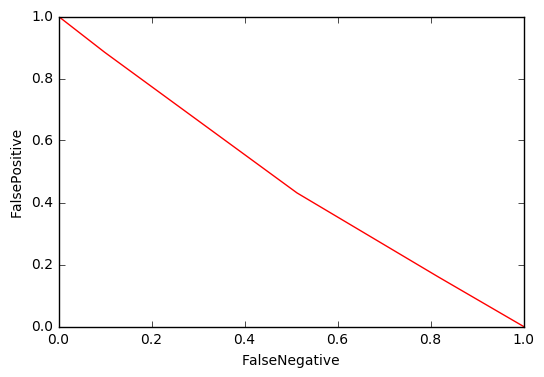

In [63]:
plt.plot(FalseNegative[0], FalsePositive[0], 'r')
plt.xlabel("FalseNegative")
plt.ylabel("FalsePositive")

# Left corner cos we want low false negative

# 3. Regression + Regularization

Consider the following data points.

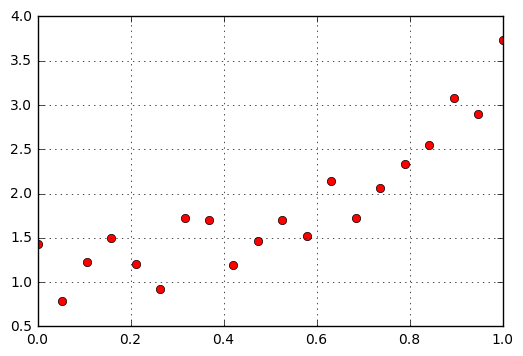

In [11]:
xs = np.array([ 0.        ,  0.05263158,  0.10526316,  0.15789474,  0.21052632,
        0.26315789,  0.31578947,  0.36842105,  0.42105263,  0.47368421,
        0.52631579,  0.57894737,  0.63157895,  0.68421053,  0.73684211,
        0.78947368,  0.84210526,  0.89473684,  0.94736842,  1.        ])

ys = np.array([ 1.43328957,  0.79286175,  1.23121202,  1.4966537 ,  1.20046242,
        0.92179229,  1.72712153,  1.70387714,  1.19614535,  1.46158381,
        1.69776375,  1.51873941,  2.14165851,  1.72157696,  2.06161889,
        2.33314082,  2.54957117,  3.07761039,  2.89394842,  3.73597637])
plt.plot(xs,ys, 'or')
plt.grid(True)

1) If we fit the following data with a straight line, 
 - Are we overfitting or underfitting? 
 - Would $E_{in}$ be high or low?
 - Would $E_{out}$ be high or low?

In [65]:
# Underfitting 
# both ein and eout will be high

2) If we fit the following data with a polynomial of degree 20, 
 - Are we overfitting or underfitting? 
 - Would $E_{in}$ be high or low?
 - Would $E_{out}$ be high or low?

In [66]:
# Overfitting
#Ein will be low, Eout will be high

3) Suppose we fit it with polynomial of degree 20 with regularization term.
 - What happen if the regularization constant($\lambda$) is too large? Why?
 - What happen if the regularization constant($\lambda$) is too small? Why?

In [67]:
# if the constant is too high and we penalize the model too hard, it will underfit
# if the constant is too small and we penalize the model too less, it will overfit

4) What should we do to pick regularization constant ($\lambda$)?

In [68]:
# graph out the Ein E out for a bunch of constants and choose the one with lower Eout

5) Why is it that regularization term starts at $w_1$ instead of $w_0$?

In [69]:
# First one is 1, it just shifts the graph

6) Fit the data with polynomial of degree 20 with $\lambda=0.01$.

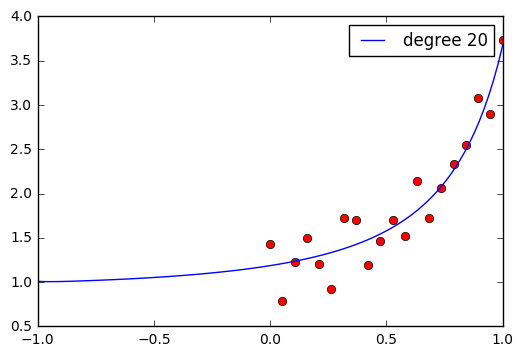

In [18]:
def expand_x(x, degree):
    return [x**i for i in range(degree + 1)]

def genericaf_cost(w, degree, lam):
    error = 0.0
    regula = 0.
    for x, y in zip(xs, ys):
        better_x = expand_x(x, degree)
        error += (y - np.dot(w, better_x))**2 
    error = error / len(xs)
    for wi in w[1:]:
        regula += (lam * (wi**2))
    error+= regula
    return error 

def costaf_for_degree(degree, lam):
    return lambda w: genericaf_cost(w, degree, lam)

def make_line(w):
    degree = len(w) - 1
    xs = np.linspace(-1,1,100)
    ys = [np.dot(w, expand_x(x, degree)) for x in xs]
    return xs, ys

deg = 20
lamd = 0.01

plt.figure()
costs = costaf_for_degree(deg, lamd)
w = minimize(costs, [0.0] * (deg + 1) ).x
linex, liney = make_line(w)
plt.plot(xs,ys, "or")
plt.plot(linex,liney, label = "degree " + str(deg))
plt.legend()

# 4. Logistic Regression

1) Supposed that we have 2 data points.

- Red(+1): $x_0 = 0.5$, $x_1 = 0.2$
- Blue(-1): $x_0 = 0.2$, $x_1 = 0.3$

What is the **likelihood** of getting these two data points if our hypothesis is $\vec{w_1} = [1,2,3]$

In [8]:
def thetha(x):
    return 1. / (1. + np.exp(-x))


x1 = [1,0.5,0.2]
x2 = [1,0.2,0.3]
w = [1,2,3]
p1 = thetha(np.dot(w, x1))
p2 = thetha(np.dot(w, x2))
print "x1 ", p1
print "x2 ", p2
print p1 * p2

x1  0.930861579657
x2  0.908877038985
0.846038716223


2) What is the **likelihood** of getting these two data points if our hypothesis is $\vec{w_2} = [-1,-2,-3]$

In [9]:
w = [-1,-2,-3]
p1 = thetha(np.dot(w, x1))
p2 = thetha(np.dot(w, x2))
print "x1 ", p1
print "x2 ", p2
print p1 * p2

x1  0.0691384203433
x2  0.0911229610149
0.00630009758158


3) Which $\vec{w}$ is better? Explain.

In [73]:
# I think none, because our w cannot differentiate between these two types of points

# 5. One more thing

Consider the following data points. The line separating the two dataset looks something like
$$ax_0 + b \sin x_0 + cx_1 + d = 0$$

for some constants $a, b, c, d$.

Build a **logistic** classifier that performs better than 85% on the training data.

Make sure you demonstrate that your classifier works more better than 85% on training data.

**Be careful**, the classes given in the file are 0 and 1.

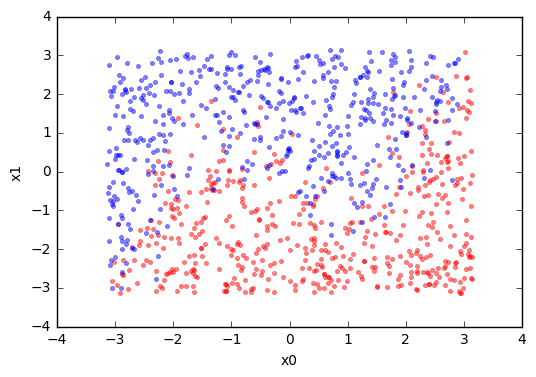

In [40]:
arr = np.genfromtxt('onemorething.csv', delimiter=',')
x0s = arr[:, 0]
x1s = arr[:, 1]
cls = arr[:, 2]
plt.plot(x0s[cls==0], x1s[cls==0], '.r', alpha=0.5)
plt.plot(x0s[cls==1], x1s[cls==1], '.b', alpha=0.5)
plt.xlabel('x0')
plt.ylabel('x1')
ndata = 500

In [41]:
dataxp = x0s[cls==1]
datayp = x1s[cls==1]

dataxm = x0s[cls==0]
dataym = x1s[cls==0]

In [78]:
def theta2(x):
    x = np.clip(x, -200, 200, out =x)
    return 1. / (1. + np.exp(-x))

def pad_extra(x,y):
    l = len(x)
    tmp = np.empty((l,4))
    tmp[:,0] = 1
    tmp[:,1] = x
    tmp[:,2] = np.sin(x)
    tmp[:,3] = y
    return tmp

class LogReg:
    def __init__(self):
        self.w = 0
    
    def fit(self,classes,features):
        def cost(w):
            return np.sum(np.log(theta2(-classes*np.dot(features, w))))
        self.w = minimize(cost, [0.]*len(features[0])).x

    def predict(self, features):
        s = np.dot(features, self.w)
        s = np.clip(s, -200, 200)
        return 1./(1 + np.exp(-s))
    
data_p = pad_extra(dataxp, datayp)
data_m = pad_extra(dataxm, dataym)
train_data = np.concatenate((data_p, data_m))
classes = np.array([1]* 496 + [-1]* 504)

lr = LogReg()
lr.fit(classes,train_data)

precision = 0
for m,p in zip(data_m, data_p):

    if lr.predict(p) > 0.5:
        precision +=1
    if lr.predict(m) <= 0.5:
        precision+=1
print (float(precision) / (ndata * 2)) * 100, "% Precision"

88.5 % Precision
